In [1]:
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('biel_train.csv')

# y_temp 결측치 제거
df = df.dropna()

# 'shape'가 'sw1'인 데이터만 df에 저장
df = df[df['shape'] == 'sw1']

# 'shape' 열 삭제
df = df.drop(['shape'], axis=1)

# one-hot encoding (shape, location)
df = pd.get_dummies(df)
columns = list(df.columns.values)
columns.remove('y_temp')
print(columns)

# 'y_temp' 데이터타입 int로 변환(float -> int)
# df = df.astype({'y_temp':'int'})

# 학습과 데이터 셋으로 분리
X = df[columns]
y = df[['y_temp']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

['max_tem', 'tem_rate', 'height', 'length', 'width', 'W_top', 'W_side', 'W_bottom', 'tem_initial', 'tem_out', 'days', 'location_bottom', 'location_center', 'location_side1', 'location_side2', 'location_top']


## model 생성

In [13]:
model = XGBRegressor(n_estimators=400) # 트리 개수 400개로 모델 생성
model.fit(X_train, y_train)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

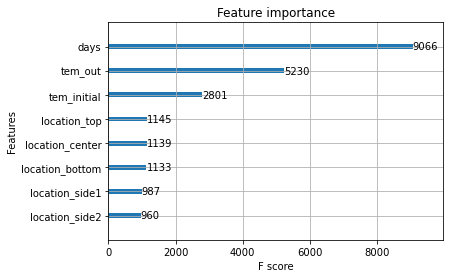

In [14]:
plot_importance(model)

## model 평가

In [15]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test) # 예측치
y_true = y_test # 정답

mse = mean_squared_error(y_true, y_pred)
mse # 손실함수: 정답에 대한 오류를 숫자로 나타낸 것(정답에 가까울수록 작은 값)

0.0894035858635667

## 훈련결과 확인

C:\Users\j\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\j\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y_temp'>

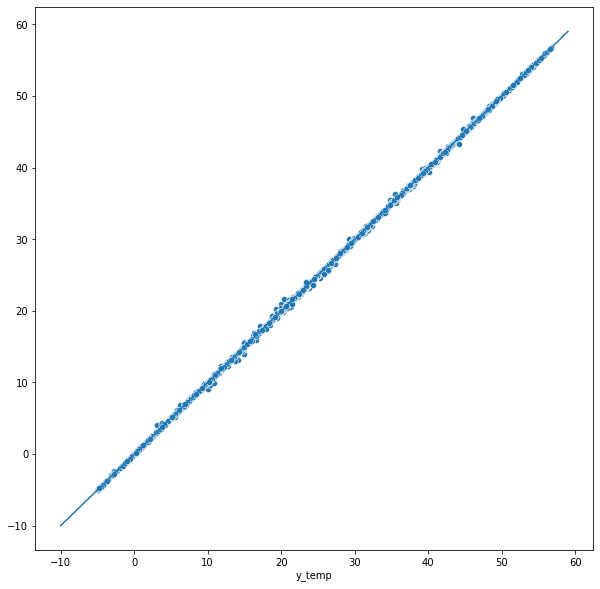

In [17]:
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(10,10))
sns.scatterplot(df['y_temp'], model.predict(X))

a = np.arange(-10,60)
b = a
sns.lineplot(a, b)

In [9]:
y_test['y_pred'] = y_pred

<ipython-input-9-827f05ec1f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['y_pred'] = y_pred


In [10]:
y_test

,y_temp,y_pred
3789,18.165551,18.116657
3757,34.252032,34.249977
1637,26.219537,26.239620
499,0.868845,0.951511
2273,21.908312,21.794100
...,...,...
1563,33.002283,32.911686
1260,32.671329,32.502117
895,44.750613,44.783581
4367,32.567548,32.462486
